<a href="https://colab.research.google.com/github/Jay-D21/Deep-Learning/blob/main/Implement%20AND%20Function%20using%20Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We are gonna follow steps given below :
* Input Setup
* Perceptron function and thresholding
* Training via perceptron update rule
* Tabulate training log
* Visualization of the decision boundary

#Imports and Initialization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tabulate import tabulate

#Define inputs and weights

In [ ]:
#Define inputs and expected outputs for AND gate
x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,1,-1])
y = np.array([1,-1,-1,-1]) #AND gate expected outputs

#Initalize weights and bias as Tenserflow variables
w1 = tf.Variable(0.0, dtype=tf.float32)
w2 = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

#Threshold (used in activation function)
theta = tf.constant(0.0, dtype=tf.float32)

Perceptron and Threshold Logic

In [ ]:
#compute weighted sum (yin) using perceptron rule
def perceptron(x1,x2, w1, w2, b):
  return (w1*x1 + w2*x2 + b)

#Apply threshold activation to convert to output class
def calculated(yin, theta):
  if yin >= theta:
    return 1
  else:
    return -1

#Train Perceptron and collect Logs

In [ ]:
#Initialize table for storing training history
table_data = []

epoch = 3 #Number of training iterations
alpha = 1 #Learning rate

for i in range(epoch):
  for j in range(4):
    yin = perceptron(x1[j], x2[j], w1, w2, b)
    yout = calculated(yin, theta)

    #If prediction is wrong, update weight and bias
    if yout != y[j]:
      w1.assign_add(alpha*y[j]*x1[j])
      w2.assign_add(alpha*y[j]*x2[j])
      b.assign_add(alpha*y[j])

    # Append the step's data to the teble
    table_data.append([x1[j], x2[j], y[j], yout, w1.numpy(), w2.numpy(), b.numpy()])

#Show Table

In [ ]:
# Print training history in table format
headers = ["x1", "x2", "y", "yout", "w1", "w2", "b"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+------+------+-----+--------+------+------+-----+
|   x1 |   x2 |   y |   yout |   w1 |   w2 |   b |
+======+======+=====+========+======+======+=====+
|    1 |    1 |   1 |      1 |    0 |    0 |   0 |
+------+------+-----+--------+------+------+-----+
|    1 |   -1 |  -1 |      1 |   -1 |    1 |  -1 |
+------+------+-----+--------+------+------+-----+
|   -1 |    1 |  -1 |      1 |    0 |    0 |  -2 |
+------+------+-----+--------+------+------+-----+
|   -1 |   -1 |  -1 |     -1 |    0 |    0 |  -2 |
+------+------+-----+--------+------+------+-----+
|    1 |    1 |   1 |     -1 |    1 |    1 |  -1 |
+------+------+-----+--------+------+------+-----+
|    1 |   -1 |  -1 |     -1 |    1 |    1 |  -1 |
+------+------+-----+--------+------+------+-----+
|   -1 |    1 |  -1 |     -1 |    1 |    1 |  -1 |
+------+------+-----+--------+------+------+-----+
|   -1 |   -1 |  -1 |     -1 |    1 |    1 |  -1 |
+------+------+-----+--------+------+------+-----+
|    1 |    1 |   1 |      1 | 

#Plotting Decision Boundary


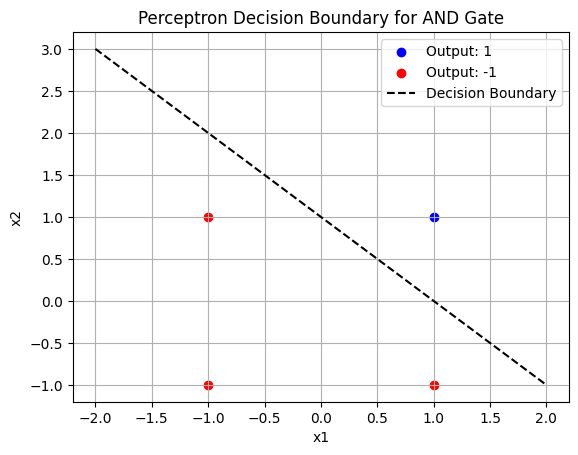

In [ ]:
# Plot input data points
for i in range(len(x1)):
    if y[i] == 1:
        plt.scatter(x1[i], x2[i], color='blue', label='Output: 1' if i == 0 else "") #Blue dot for [1,1] with label "Output: 1"
    else:
        plt.scatter(x1[i], x2[i], color='red', label='Output: -1' if i == 1 else "") #Red dots for [1, -1], [-1, 1], [-1, -1] with label "Output: -1" (only once)

# Compute line: w1*x + w2*y + b = 0 → y = (-w1*x - b)/w2
x_vals = np.linspace(-2, 2, 100)
w1_val = w1.numpy()
w2_val = w2.numpy()
b_val = b.numpy()

if w2_val != 0:
    y_vals = (-w1_val * x_vals - b_val) / w2_val
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    plt.axvline(-b_val / w1_val, color='k', linestyle='--', label='Decision Boundary')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary for AND Gate")
plt.grid(True)
plt.legend()
plt.show()
